In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
%matplotlib inline

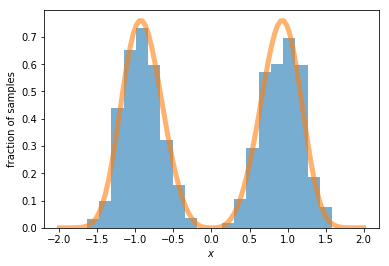

In [323]:
dweibull = sts.dweibull(4.)
sample = dweibull.rvs(1000)

# Гистограмма выборки:
plt.hist(sample, normed=True, alpha=0.6, label='hist', bins=20)
plt.ylabel('fraction of samples')
plt.xlabel('$x$')

# на том же графике построим теоретическую плотность распределения (probability density function):
x = np.linspace(-2., 2., 100)
pdf = dweibull.pdf(x)
plt.plot(x, pdf, label='theoretical pdf', alpha=0.6, lw=5)

Согласно центральной предельной теореме, распределение выборочного среднего стремится при n -> ∞ к:

\begin{align}
N(\mu, \sigma^2 / n) \\
\end{align}

Где μ и σ - математическое ожидание и среднеквадратичное отклонение исходного распрделения, соответственно.

То есть среднеквадратичное отклонение нормального распределения равно:

\begin{align}
\sigma_1 & = \sqrt{\sigma^2 / n} = \sqrt{D / n} \\
\end{align}

Где D - дисперсия исходного распределения.

In [324]:
def sample_distr(n):
    means = []
    for i in range(1000):
        means.append(dweibull.rvs(n).mean())
    plt.hist(means, normed=True, alpha=0.6, label='hist', bins=20)
    plt.ylabel('fraction of samples')
    plt.xlabel('$x$')

    # на том же графике построим теоретическую плотность распределения (probability density function):
    x = np.linspace(-1, 1, 100)
    # посчитаем среднее и дисперсию нормального распределения, которым приблиается распределение выборочных средних
    mean_1 = dweibull.mean()
    sigma_1 = (dweibull.var() / n) ** 0.5
    norm = sts.norm(loc=mean_1, scale=sigma_1)
    pdf = norm.pdf(x)
    plt.plot(x, pdf, label='norm theoretical pdf', alpha=0.6, lw=5)

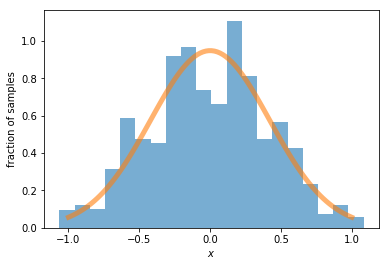

In [325]:
sample_distr(5)

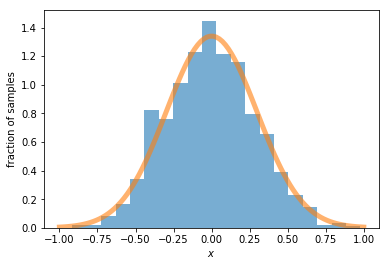

In [326]:
sample_distr(10)

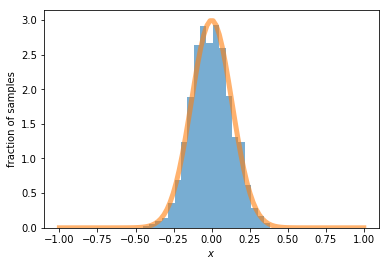

In [327]:
sample_distr(50)

Как видно из графиков, с увеличением n распределение выборочного среднего все ближе к нормальному.